In [72]:
from dotenv import load_dotenv
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import random
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
load_dotenv()
path = Path(os.getenv('PATH_DATASET2')).joinpath('user_publictracks')

In [7]:
users = ['ChillBeatsMusic', 'anjunadeep', 'spinninrecordsofficial', 'enhanced_music', \
        'emergentmusic', 'armadamusicofficial', 'spotify', 'silkmusic', 'Anjunabeats']
timbre_ = ['timbre_{}'.format(i+1) for i in range(12)]
pitch_ = ['pitch_{}'.format(i+1) for i in range(12)]

In [19]:
# Read dataset, spilt columns for pitch and timbre vectors in segment dataframes
# Make separate list of track names and updated segments dataframes

tracks_seg = []
tracks_name = []
for u in users:
    
    p = path.joinpath(u)
    pl = read_dataset(p)
    
    for i in range(len(pl)):
        for track in pl[i][1]:
            tracks_name.append(track[0])
            tracks_seg.append(split_columns(track[1], pitch_cols=pitch_, timbre_cols=timbre_, ))

In [ ]:
# Check for null values in segments dataframe

nulls_in = []
for i in  range(len(tracks_seg)):
    n = tracks_seg[i].isnull().sum().sum()
    if n > 0:
        nulls_in.append(i)

In [20]:
# Make a mins list and a max list of timbre elements of each track

timbre_mins = []
timbre_maxs = []

for tr_seg in tracks_seg:
    
    min_ , max_ = timbre_minmax_tr(tr_seg)
    timbre_mins.append(min_)
    timbre_maxs.append(max_)

In [50]:
# Evaluate population min and max of timbre elements

pop_timbre_min, pop_timbre_max = pop_timbre_minmax(timbre_mins, timbre_maxs)

No missing values in the dataset


In [55]:
if len(timbre_mins) == len(timbre_maxs):
    print('Total number of tracks : ', len(timbre_mins))

if nulls_in:
    print('\nCheck "nulls_in" to see which tracks have missing values')
else:
    print('\nThere are no missing values in the dataset')
    
print('\nMinimum of timbre vec values for a sample track :\n ', timbre_mins[0])   
print('\nMaximum of timbre vec values for a sample track :\n ', timbre_maxs[0]) 

print('\nMinimums of timbre values over the whole dataset: \n{}'.format(pop_timbre_min))
print('\nMaximums of timbre values over the whole dataset: \n{}'.format(pop_timbre_max))

Total number of tracks :  17761

No missing values in the dataset

Minimum of timbre vec values for a sample track :
  [20.302, -257.775, -200.222, -181.757, -51.983, -133.743, -71.181, -91.583, -57.434, -76.362, -88.65, -27.855]

Maximum of timbre vec values for a sample track :
  [48.524, 181.384, 154.531, 202.137, 118.248, 170.899, 83.646, 91.682, 42.99, 60.133, 83.835, 50.14]

Minimums of timbre values over the whole dataset: 
[0.0, -322.865, -278.962, -490.525, -132.983, -226.554, -154.626, -265.014, -130.045, -171.812, -225.885, -79.988]

Maximums of timbre values over the whole dataset: 
[62.865, 571.07, 367.268, 520.954, 260.586, 363.583, 178.393, 246.66, 104.038, 199.165, 205.959, 85.213]


Text(0.5, 1.0, 'Spread of each timbre element')

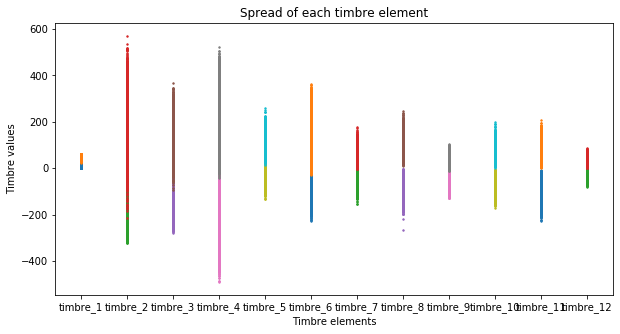

In [44]:
fig= plt.figure(figsize=(10, 5))

for i in range(len(timbre_)):
    plt.scatter([timbre_[i]] * len(timbre_mins), [t[i] for t in timbre_mins], s=2)
    plt.scatter([timbre_[i]] * len(timbre_mins), [t[i] for t in timbre_maxs], s=2)

plt.xlabel('Timbre elements')
plt.ylabel('Timbre values')
plt.title('Spread of each timbre element' )

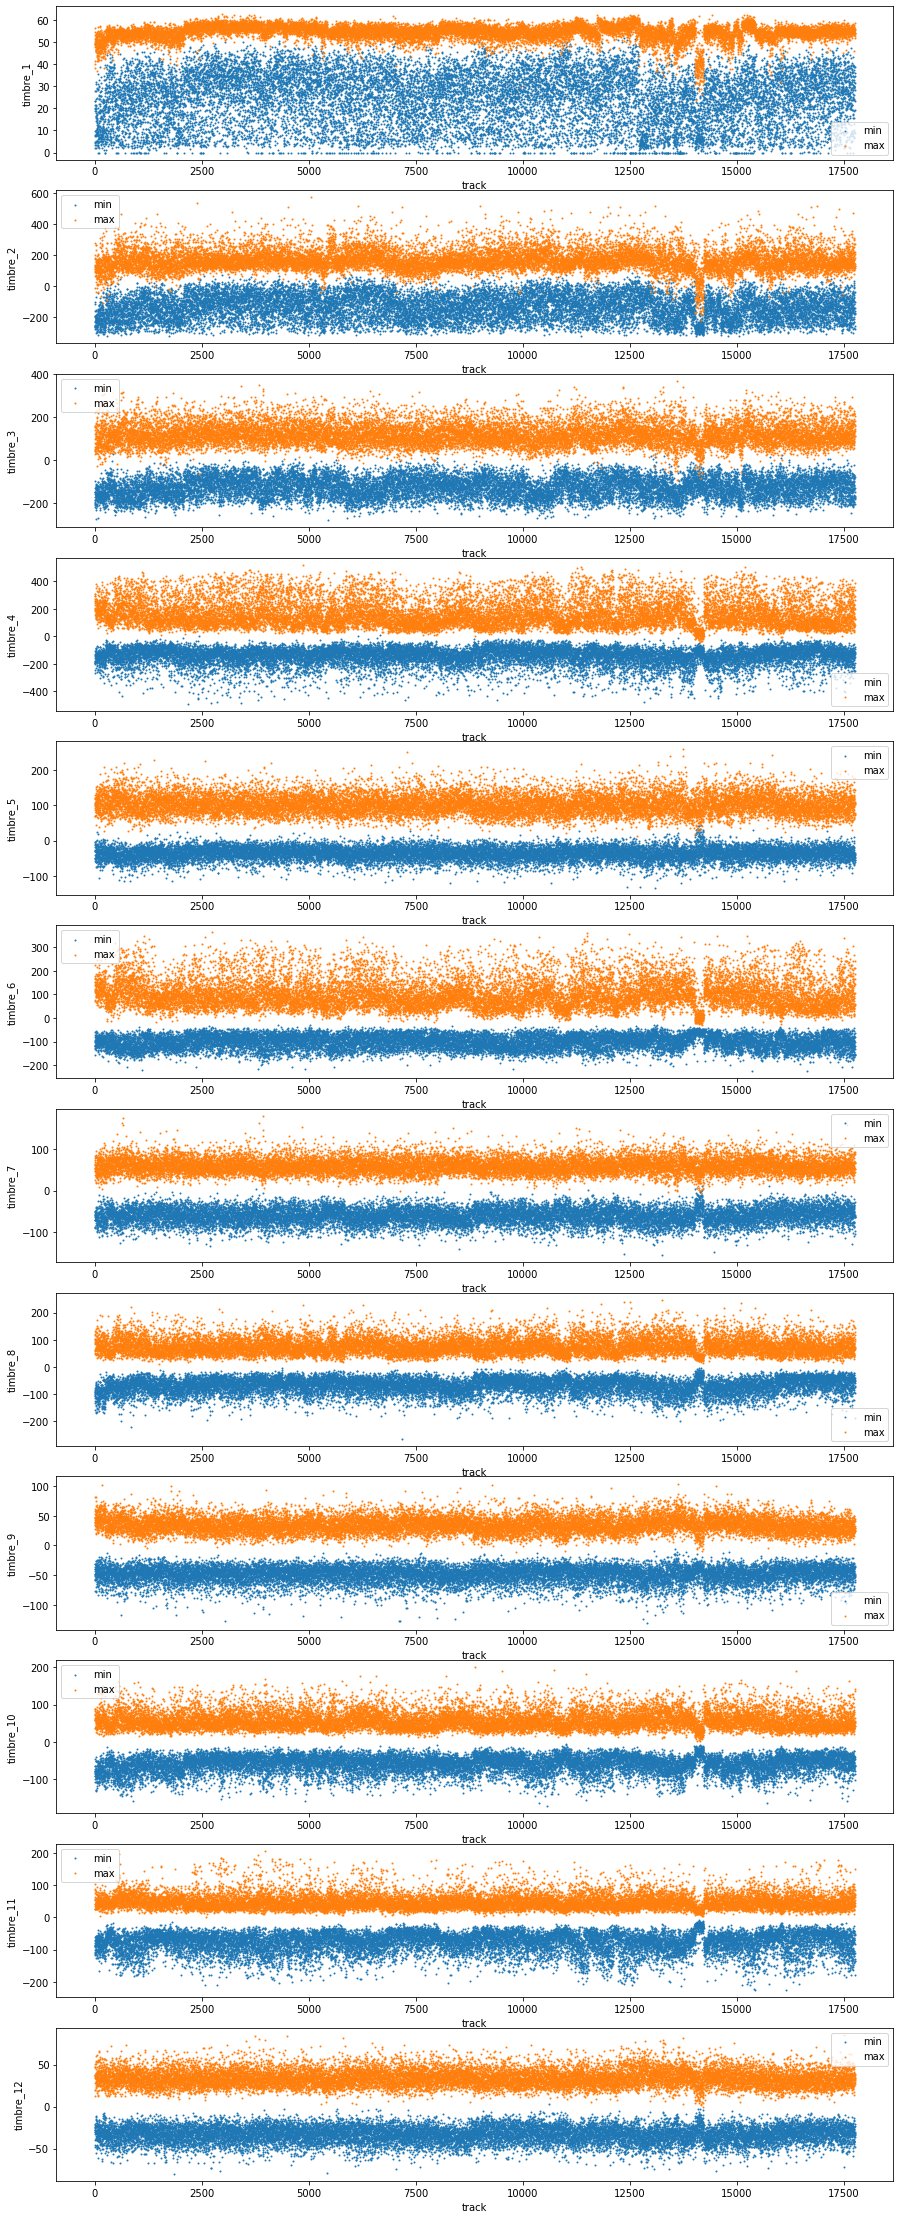

In [41]:
x = [i for i in range(17761)]
fig = plt.figure(figsize=(15, 40))
for i in range(12): 
    plt.subplot(12, 1 , i+1)
    plt.scatter(x, [t[i] for t in timbre_mins], s=1)
    plt.scatter(x, [t[i] for t in timbre_maxs], s=1)
    plt.legend(['min', 'max'])
    plt.xlabel('track')
    plt.ylabel('timbre_{}'.format(i+1))

From the above graphs we can see that not all timbre elements fluctuate in the same manner. Moreover, since it is recommended
that timbre values should only be used to compared to each other, be it among segments or tracks, it wouldn't make sense to
read much into these graphs. As for the distribution of these values, we should check tracks from 14000 to 14500 to see why their min and max timbre values differ from the rest. It is difficult to ascertain outliers for these features.

In [ ]:
y = transform_dataset(tracks_seg, pop_timbre_min, pop_timbre_max)

In [ ]:
len()y